## Obtaining the Efficient Frontier - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [2]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.88961663,  0.11038337])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [3]:
np.sum(weights * log_returns.mean()) * 250

0.03413768338736278

Expected Portfolio Variance:

In [4]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.02772882867421823

Expected Portfolio Volatility:

In [5]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.16651975460652779

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [6]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [7]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.1146717386637816,
  0.15546170462512313,
  0.2601337521223428,
  0.18017396317334525,
  0.11997976940223051,
  0.11638328371362654,
  0.15847855556022572,
  0.051254721437282276,
  0.16097737019981476,
  0.106176417489055,
  0.20720121659907723,
  0.17227825246803197,
  0.14084073027150826,
  0.23930842227218443,
  0.20015360137047952,
  0.150542911903136,
  0.12178252425450536,
  0.15124696616420502,
  0.20656972577627986,
  0.1718886325038389,
  0.06621813122044731,
  0.15950532469366904,
  0.09575425321484624,
  0.16213076512566058,
  0.06827853032980924,
  0.280018330575715,
  0.27940042718007463,
  0.14645123695876067,
  0.1084844980432865,
  0.11139236621631012,
  0.25371144964281706,
  0.10202843549781801,
  0.08495175782313377,
  0.10038038403954512,
  0.10583684361812543,
  0.15431274086446511,
  0.14895391700318697,
  0.19443645762542786,
  0.06821604690237366,
  0.20617096915174973,
  0.13605717741889933,
  0.15822247433208478,
  0.11173046673138136,
  0.2197082066306374

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [8]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([ 0.11467174,  0.1554617 ,  0.26013375,  0.18017396,  0.11997977,
         0.11638328,  0.15847856,  0.05125472,  0.16097737,  0.10617642,
         0.20720122,  0.17227825,  0.14084073,  0.23930842,  0.2001536 ,
         0.15054291,  0.12178252,  0.15124697,  0.20656973,  0.17188863,
         0.06621813,  0.15950532,  0.09575425,  0.16213077,  0.06827853,
         0.28001833,  0.27940043,  0.14645124,  0.1084845 ,  0.11139237,
         0.25371145,  0.10202844,  0.08495176,  0.10038038,  0.10583684,
         0.15431274,  0.14895392,  0.19443646,  0.06821605,  0.20617097,
         0.13605718,  0.15822247,  0.11173047,  0.21970821,  0.19787301,
         0.13471087,  0.1163406 ,  0.15421219,  0.18812196,  0.12604416,
         0.15006153,  0.26521761,  0.09589759,  0.00462632,  0.26340022,
         0.06282066,  0.14218436,  0.09442137,  0.10611445,  0.26488901,
         0.06969114,  0.10224735,  0.13876927,  0.02930679,  0.18910043,
         0.04616682,  0.07412732,  0.24908631,  0.1

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [9]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

In [10]:
portfolios.head()

,Return,Volatility
0,0.114672,0.169223
1,0.155462,0.187109
2,0.260134,0.263741
3,0.180174,0.202003
4,0.119980,0.170999


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

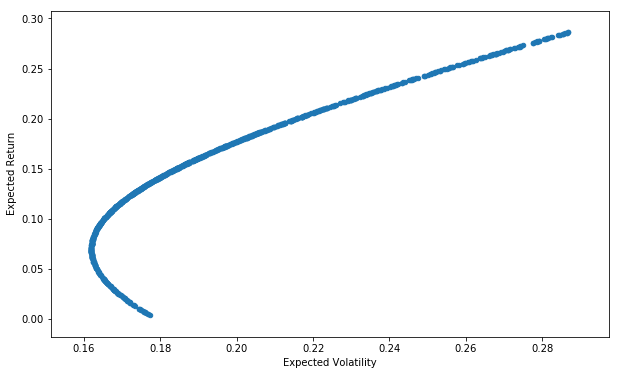

In [11]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

******

What do you think would happen if you re-created the Markowitz Efficient Frontier for 3 stocks? The code you have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). Insert it in your data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

How would you interpret the obtained graph? 


In [12]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [13]:
pf_data.head()

,WMT,FB,BP
Date,,,
2014-01-02,72.254228,54.709999,39.112259
2014-01-03,72.016156,54.560001,39.022589
2014-01-06,71.613266,57.200001,39.128563
2014-01-07,71.833021,57.919998,39.576910
2014-01-08,71.265320,58.230000,39.723643


In [14]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [15]:
num_assets = len(assets)
num_assets

3

In [16]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.23326567,  0.76156451,  0.00516983])

In [17]:
weights[0] + weights[1] + weights[2]

1.0

Expected Portfolio Return:

In [18]:
np.sum(weights * log_returns.mean()) * 250

0.2193653224942498

Expected Portfolio Variance:

In [19]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.053062699039245736

Expected Portfolio Volatility:

In [20]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.23035342202634138

*****

In [21]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.08390155,  0.09771026,  0.08159885,  0.13356891,  0.15938601,
         0.04244245, -0.01142913,  0.09993618,  0.09913962,  0.04587794,
         0.01903325,  0.07631141, -0.01081262, -0.00672752,  0.01901643,
         0.13383508,  0.04964453,  0.0303108 ,  0.09985471,  0.15423854,
         0.13313519,  0.05742658,  0.07144604,  0.11525468,  0.12374892,
         0.07458489,  0.09985273, -0.01816468,  0.03284373,  0.10999639,
         0.08772636,  0.1952487 ,  0.00906768,  0.02310631,  0.13415663,
         0.08489395,  0.1010062 ,  0.22058346,  0.01334209,  0.10489745,
         0.08834464,  0.11534229,  0.07155513,  0.09024282,  0.0403311 ,
         0.0956964 ,  0.17419531,  0.02253848,  0.00781126,  0.11549633,
         0.12510665,  0.06350782,  0.16479933,  0.11176433,  0.06003903,
         0.0890827 ,  0.0683139 ,  0.06003289,  0.02369723,  0.06743235,
         0.11294162,  0.13814429,  0.02760591,  0.07650292,  0.11597322,
         0.07274659,  0.08022738,  0.10144956,  0.0

In [22]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

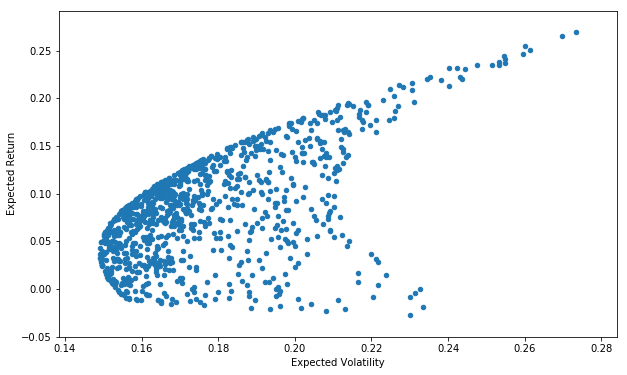

In [23]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')